In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'5')

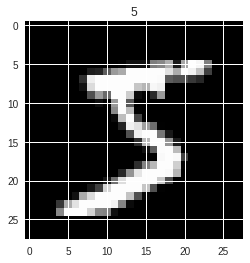

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [0]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
model = Sequential()

model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [9]:
model.fit(train_x, train_y, batch_size=128, nb_epoch=5, validation_data=(val_x, val_y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 113us/step - loss: 0.2870 - acc: 0.9116 - val_loss: 0.1369 - val_acc: 0.9589
Epoch 2/5
48000/48000 [==============================] - 3s 69us/step - loss: 0.1209 - acc: 0.9635 - val_loss: 0.0995 - val_acc: 0.9697
Epoch 3/5
48000/48000 [==============================] - 3s 69us/step - loss: 0.0852 - acc: 0.9737 - val_loss: 0.0944 - val_acc: 0.9731
Epoch 4/5
48000/48000 [==============================] - 3s 69us/step - loss: 0.0707 - acc: 0.9782 - val_loss: 0.0935 - val_acc: 0.9745
Epoch 5/5
48000/48000 [==============================] - 3s 69us/step - loss: 0.0582 - acc: 0.9816 - val_loss: 0.0838 - val_acc: 0.9761


In [10]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 57us/step

Test accuracy:  0.9776


In [0]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('output.csv', index=False)